<a href="https://colab.research.google.com/github/enthokz/Prediction-Model-Exercise/blob/main/Prediction_Model_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **About This Project**

Imagine we have work for a finacial company called 'Finanku' who offer some finance product such as crredit card. We have job to analyze the customers that have chance falied to pay a bill of their credit card. For that reason, we have to build a method that can predict customers from several background checker to clasify customers who will have some probles with their credit card.

# **Preparation**

## Instal and import package

In [1]:
# Instal jpcoml
!pip install jcopml

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 47.0 MB/s eta 0:00:00
  Created wheel for jcopml: filename=jcopml-1.2.7-py2.py3-none-any.whl size=45916 sha256=4758bd9e60525986c32982192218b190f60ca32402ef69e8782811835d01ba69
  Stored in directory: /root/.cache/pip/wheels/75/3e/99/c295e1e77d6c2c5d7db86f28daee05e6656bdfa86ae5001c00
Successfully built jcopml


In [92]:
# Import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, make_scorer, accuracy_score, precision_score,recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from jcopml.feature_importance import mean_score_decrease

## Load Dataset

In [3]:
# Load dataset
source1= '/content/drive/MyDrive/Colab Notebooks/DataBase/Copy of FinanKu Data All.csv'
source2= '/content/drive/MyDrive/Colab Notebooks/DataBase/Copy of FinanKu Data Validasi.csv'
# Data for prediction
data_pred=pd.read_csv(source1)
# Data for validation
data_val=pd.read_csv(source2)

In [4]:
data_pred.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q1,NumOfProducts Q1,HasCrCard Q1,ActiveMember Q1,Balance Q2,...,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Unpaid Tagging
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,1,0.0,...,0,0.00,1,1,0,1187036.18,1,1,1,1
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,1,0.0,...,0,0.00,2,1,0,0.00,2,1,0,0
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.0,...,0,0.00,2,1,0,1351820.24,2,1,1,0
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,1,0.0,...,0,0.00,2,1,0,0.00,2,1,0,0
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,0.0,...,0,678905.68,2,1,1,431190.68,2,1,1,0


In [5]:
data_val.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,...,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Balance Q5,NumOfProducts Q5,HasCrCard Q5,ActiveMember Q5,Unpaid Tagging
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,0,0.00,...,0,1187036.18,1,1,1,1305739.798,1,1,1,1
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,0,0.00,...,0,0.00,2,1,0,0.000,2,1,0,1
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.00,...,0,1351820.24,2,1,1,1622184.288,2,1,1,0
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,0,0.00,...,0,0.00,2,1,0,0.000,4,1,0,1
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,678905.68,...,1,431190.68,2,1,1,431190.680,3,1,0,0


In [6]:
# Data for Two Experiment Prediction
data1=pd.read_csv(source1)
data2=pd.read_csv(source1)

# **Data Understanding**

## Distribution of Customer

Distribution of total customers and unpaid tagging customers based on:
- location
- age

In [7]:
# Location of customers
city_total=data1.groupby('City')['Customer ID'].count()\
          .sort_values(ascending=False).reset_index(name='Nummber of Customers')
city_unpaid=data1[data1['Unpaid Tagging']==1].groupby('City')['Customer ID'].count()\
          .sort_values(ascending=False).reset_index(name='Number of Customers')

print('Total Customers Location')
print(city_total)
print('\nUnpaid Customers Location')
print(city_unpaid)

Total Customers Location
       City  Nummber of Customers
0  Surabaya                  3767
1   Bandung                  1898
2   Jakarta                  1896

Unpaid Customers Location
       City  Number of Customers
0  Surabaya                 1033
1   Bandung                  496
2   Jakarta                  490


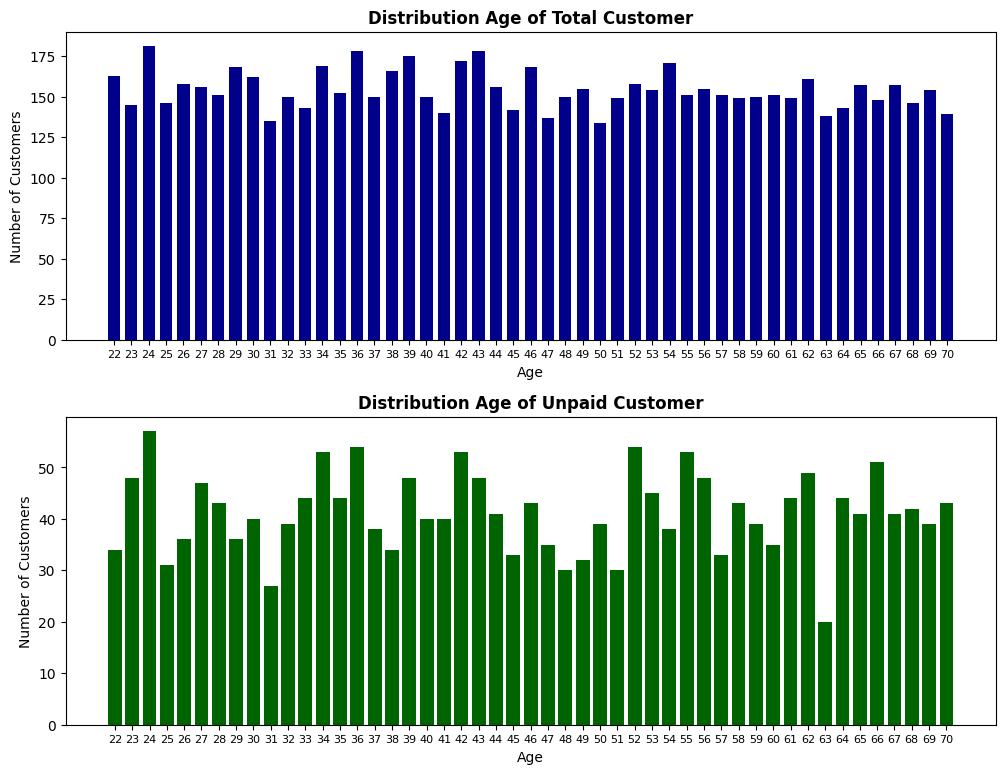

In [8]:
# Age of Customer
age_total=data1.groupby('Age')['Customer ID'].count()\
          .sort_values(ascending=False).reset_index(name='Number of Customers')
age_unpaid=data1[data1['Unpaid Tagging']==1].groupby('Age')['Customer ID'].count()\
          .sort_values(ascending=False).reset_index(name='Number of Customers')
# Create table
plt.figure(figsize=(12,14))

plt.subplot(311)
plt.bar(x=age_total['Age'],height=age_total['Number of Customers'],data=age_total,width=0.7,color='darkblue')
plt.xticks(age_total['Age'],labels=age_total['Age'],fontsize=8)
plt.title('Distribution Age of Total Customer',fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Number of Customers')

plt.subplot(3,1,2)
plt.bar(x=age_unpaid['Age'],height=age_unpaid['Number of Customers'],data=age_unpaid,color='darkgreen')
plt.xticks(age_unpaid['Age'],labels=age_unpaid['Age'],fontsize=8)
plt.title('Distribution Age of Unpaid Customer',fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Number of Customers')

plt.subplots_adjust(hspace=0.25)
plt.show()

## Portofolio Check

Customers clasified on 'Unpaid Tagging' column:
- 0 : paid
- 1 : unpaid

In [9]:
# Customer Balance Check
cbal=data1.copy()
cbal['total_balance']= cbal['Balance Q1']+cbal['Balance Q2']+cbal['Balance Q3']+cbal['Balance Q4']
cbal['avg_balance']= (cbal['Balance Q1']+cbal['Balance Q2']+cbal['Balance Q3']+cbal['Balance Q4'])/4

In [10]:
total=cbal.groupby('Unpaid Tagging')['total_balance'].mean().reset_index(name='Avg Balance')
avg=cbal.groupby('Unpaid Tagging')['avg_balance'].mean().reset_index(name='Avg Balance')
total['Avg Balance']=total['Avg Balance'].apply(lambda x: '%1.2e' %x)
avg['Avg Balance']=avg['Avg Balance'].apply(lambda x: '{:.2e}'.format(x))

print('Average Balance Anually')
print(total)
print('\nAverage Balance per Quartal')
print(avg)

Average Balance Anually
   Unpaid Tagging Avg Balance
0               0    1.99e+08
1               1    2.53e+08

Average Balance per Quartal
   Unpaid Tagging Avg Balance
0               0    4.96e+07
1               1    6.32e+07


In [11]:
# Average Customer's Products
cpro=data1.copy()
cpro['avg_product']= (cpro['NumOfProducts Q1']+cpro['NumOfProducts Q2']+cpro['NumOfProducts Q3']+cpro['NumOfProducts Q4'])/4

In [12]:
cproo = cpro.groupby('Unpaid Tagging')['avg_product'].mean().reset_index(name='avg_product')
print("Average Customer's Product")
print(cproo)

Average Customer's Product
   Unpaid Tagging  avg_product
0               0     1.667223
1               1     1.609336


# **Data Preparation**

In [13]:
# Duplicated Data Check
data_pred.duplicated().sum()

np.int64(0)

In [14]:
# Data null check
data_pred.isnull().sum()

,0
Customer ID,0
Branch Code,0
City,0
Age,0
Avg. Annual Income/Month,0
Balance Q1,0
NumOfProducts Q1,0
HasCrCard Q1,0
ActiveMember Q1,0
Balance Q2,0


## Adding Related Variabel

We seperate data for two type of experiment:
- experiment 1 : based on last year
- experiment 2 : based on last six months

Add new collomns that contains for future analysis.

In [15]:
# Avg Balance and Delta Balance

# Experiment 1
data1['avg balance']=(data1['Balance Q1']+data1['Balance Q2']+data1['Balance Q3']+data1['Balance Q4'])
data1['delta balance']=data1['Balance Q4']-data1['Balance Q1']
data1.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q1,NumOfProducts Q1,HasCrCard Q1,ActiveMember Q1,Balance Q2,...,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Unpaid Tagging,avg balance,delta balance
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,1,0.0,...,1,1,0,1187036.18,1,1,1,1,1187036.18,1187036.18
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,1,0.0,...,2,1,0,0.00,2,1,0,0,0.00,0.00
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.0,...,2,1,0,1351820.24,2,1,1,0,1351820.24,1351820.24
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,1,0.0,...,2,1,0,0.00,2,1,0,0,0.00,0.00
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,0.0,...,2,1,1,431190.68,2,1,1,0,1110096.36,431190.68


In [16]:
# Experiment 2
data2['avg balance']=(data2['Balance Q3']+data2['Balance Q4'])/2
data2['delta balance']=data2['Balance Q4']-data2['Balance Q2']
data2.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q1,NumOfProducts Q1,HasCrCard Q1,ActiveMember Q1,Balance Q2,...,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Unpaid Tagging,avg balance,delta balance
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,1,0.0,...,1,1,0,1187036.18,1,1,1,1,593518.09,1187036.18
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,1,0.0,...,2,1,0,0.00,2,1,0,0,0.00,0.00
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.0,...,2,1,0,1351820.24,2,1,1,0,675910.12,1351820.24
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,1,0.0,...,2,1,0,0.00,2,1,0,0,0.00,0.00
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,0.0,...,2,1,1,431190.68,2,1,1,0,555048.18,431190.68


In [17]:
# Active Member Status

# Experiment 1
data1['active month']= (data1['ActiveMember Q1']+data1['ActiveMember Q2']+
                        data1['ActiveMember Q3']+data1['ActiveMember Q4'])*3
data1.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q1,NumOfProducts Q1,HasCrCard Q1,ActiveMember Q1,Balance Q2,...,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Unpaid Tagging,avg balance,delta balance,active month
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,1,0.0,...,1,0,1187036.18,1,1,1,1,1187036.18,1187036.18,6
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,1,0.0,...,1,0,0.00,2,1,0,0,0.00,0.00,3
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.0,...,1,0,1351820.24,2,1,1,0,1351820.24,1351820.24,3
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,1,0.0,...,1,0,0.00,2,1,0,0,0.00,0.00,3
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,0.0,...,1,1,431190.68,2,1,1,0,1110096.36,431190.68,6


In [18]:
# Experiment 2
data2['active month']= (data1['ActiveMember Q3']+data1['ActiveMember Q4'])*3
data2.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q1,NumOfProducts Q1,HasCrCard Q1,ActiveMember Q1,Balance Q2,...,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Unpaid Tagging,avg balance,delta balance,active month
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,1,0.0,...,1,0,1187036.18,1,1,1,1,593518.09,1187036.18,3
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,1,0.0,...,1,0,0.00,2,1,0,0,0.00,0.00,0
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.0,...,1,0,1351820.24,2,1,1,0,675910.12,1351820.24,3
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,1,0.0,...,1,0,0.00,2,1,0,0,0.00,0.00,0
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,0.0,...,1,1,431190.68,2,1,1,0,555048.18,431190.68,6


In [19]:
# Product Holding Ownership

# Experiment 1
data1['diff product']= data1['NumOfProducts Q4']-data1['NumOfProducts Q1']
data1.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q1,NumOfProducts Q1,HasCrCard Q1,ActiveMember Q1,Balance Q2,...,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Unpaid Tagging,avg balance,delta balance,active month,diff product
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,1,0.0,...,0,1187036.18,1,1,1,1,1187036.18,1187036.18,6,0
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,1,0.0,...,0,0.00,2,1,0,0,0.00,0.00,3,0
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.0,...,0,1351820.24,2,1,1,0,1351820.24,1351820.24,3,0
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,1,0.0,...,0,0.00,2,1,0,0,0.00,0.00,3,0
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,0.0,...,1,431190.68,2,1,1,0,1110096.36,431190.68,6,0


In [20]:
# Experiment 2
data2['diff product']= data2['NumOfProducts Q4']-data2['HasCrCard Q2']
data2.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q1,NumOfProducts Q1,HasCrCard Q1,ActiveMember Q1,Balance Q2,...,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Unpaid Tagging,avg balance,delta balance,active month,diff product
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,1,0.0,...,0,1187036.18,1,1,1,1,593518.09,1187036.18,3,0
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,1,0.0,...,0,0.00,2,1,0,0,0.00,0.00,0,1
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.0,...,0,1351820.24,2,1,1,0,675910.12,1351820.24,3,1
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,1,0.0,...,0,0.00,2,1,0,0,0.00,0.00,0,1
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,0.0,...,1,431190.68,2,1,1,0,555048.18,431190.68,6,1


In [21]:
# Duration Credit Card Ownership

# Define Function
def cr_dur(x):
  if x['HasCrCard Q1']==1:
    return 12
  elif x['HasCrCard Q2']==1:
    return 9
  elif x['HasCrCard Q3']==1:
    return 6
  else:
    return 3
  return np.NaN

In [22]:
# Experiment 1
data1['vintage CC']=data1.apply(cr_dur, axis=1)
data1.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q1,NumOfProducts Q1,HasCrCard Q1,ActiveMember Q1,Balance Q2,...,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Unpaid Tagging,avg balance,delta balance,active month,diff product,vintage CC
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,1,0.0,...,1187036.18,1,1,1,1,1187036.18,1187036.18,6,0,12
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,1,0.0,...,0.00,2,1,0,0,0.00,0.00,3,0,12
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.0,...,1351820.24,2,1,1,0,1351820.24,1351820.24,3,0,12
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,1,0.0,...,0.00,2,1,0,0,0.00,0.00,3,0,12
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,0.0,...,431190.68,2,1,1,0,1110096.36,431190.68,6,0,12


In [23]:
# Experiment 2
data2['vintage CC']= data2.apply(cr_dur,axis=1)
data2.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q1,NumOfProducts Q1,HasCrCard Q1,ActiveMember Q1,Balance Q2,...,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Unpaid Tagging,avg balance,delta balance,active month,diff product,vintage CC
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,1,0.0,...,1187036.18,1,1,1,1,593518.09,1187036.18,3,0,12
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,1,0.0,...,0.00,2,1,0,0,0.00,0.00,0,1,12
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.0,...,1351820.24,2,1,1,0,675910.12,1351820.24,3,1,12
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,1,0.0,...,0.00,2,1,0,0,0.00,0.00,0,1,12
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,0.0,...,431190.68,2,1,1,0,555048.18,431190.68,6,1,12


## Drop unnecessary Column

Drop some column that has been replaced by Related Variabel added before
- HasCrCard => vintage CC
- Balance => avg balance & delta balance
- NumOfProduct => diff product
- ActiveMember => active month

In [24]:
# Drop HasCrCard
data1=data1.drop(columns=['HasCrCard Q1','HasCrCard Q2','HasCrCard Q3','HasCrCard Q4'])
data2=data2.drop(columns=['HasCrCard Q1','HasCrCard Q2','HasCrCard Q3','HasCrCard Q4'])

In [25]:
# Drop Balance per Quarter
data1=data1.drop(columns=['Balance Q1','Balance Q2','Balance Q3','Balance Q4'])
data2=data2.drop(columns=['Balance Q1','Balance Q2','Balance Q3','Balance Q4'])

In [26]:
# Drop NumOfProduct
data1=data1.drop(columns=['NumOfProducts Q1','NumOfProducts Q2','NumOfProducts Q3','NumOfProducts Q4'])
data2=data2.drop(columns=['NumOfProducts Q1','NumOfProducts Q2','NumOfProducts Q3','NumOfProducts Q4'])

In [27]:
# Drop ActiveMember
data1=data1.drop(columns=['ActiveMember Q1','ActiveMember Q2','ActiveMember Q3','ActiveMember Q4'])
data2=data2.drop(columns=['ActiveMember Q1','ActiveMember Q2','ActiveMember Q3','ActiveMember Q4'])

# **Data Transformation**

## Seperate Predictor Data

For create a prediction model we need seperate independent(predictor data) and dependent value from the tabel. In this case the dependent value is Customer ID and UNpaid Tagging columns.

In [28]:
# Seperate non predictor data
predic1=data1[data1.columns.difference(['Customer ID','Unpaid Tagging'])]
predic2=data2[data2.columns.difference(['Customer ID','Unpaid Tagging'])]

In [29]:
predic1.head()

,Age,Avg. Annual Income/Month,Branch Code,City,active month,avg balance,delta balance,diff product,vintage CC
0,29,33000000,1001,Jakarta,6,1187036.18,1187036.18,0,12
1,68,17000000,1005,Jakarta,3,0.00,0.00,0,12
2,25,12000000,1009,Jakarta,3,1351820.24,1351820.24,0,12
3,42,19000000,1008,Jakarta,3,0.00,0.00,0,12
4,43,29000000,1009,Jakarta,6,1110096.36,431190.68,0,12


In [30]:
predic2.head()

,Age,Avg. Annual Income/Month,Branch Code,City,active month,avg balance,delta balance,diff product,vintage CC
0,29,33000000,1001,Jakarta,3,593518.09,1187036.18,0,12
1,68,17000000,1005,Jakarta,0,0.00,0.00,1,12
2,25,12000000,1009,Jakarta,3,675910.12,1351820.24,1,12
3,42,19000000,1008,Jakarta,0,0.00,0.00,1,12
4,43,29000000,1009,Jakarta,6,555048.18,431190.68,1,12


## Seperate Categorical and Numerical Data

Encoding for categorical data type:
- Branch Code
- City

data must be string data type first.

In [31]:
# Chang data type of branch code column
predic1['Branch Code']=predic1['Branch Code'].astype(str)
predic2['Branch Code']=predic2['Branch Code'].astype(str)

/tmp/ipython-input-2059241696.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predic1['Branch Code']=predic1['Branch Code'].astype(str)
/tmp/ipython-input-2059241696.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predic2['Branch Code']=predic2['Branch Code'].astype(str)


In [32]:
# Check dtype
predic1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7561 entries, 0 to 7560
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       7561 non-null   int64  
 1   Avg. Annual Income/Month  7561 non-null   int64  
 2   Branch Code               7561 non-null   object 
 3   City                      7561 non-null   object 
 4   active month              7561 non-null   int64  
 5   avg balance               7561 non-null   float64
 6   delta balance             7561 non-null   float64
 7   diff product              7561 non-null   int64  
 8   vintage CC                7561 non-null   int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 531.8+ KB


In [33]:
# Change Categorical/object data to numerical data for easier analysis
predic1=pd.get_dummies(predic1,dtype=int)
predic2=pd.get_dummies(predic2,dtype=int)

In [34]:
predic1.head()

,Age,Avg. Annual Income/Month,active month,avg balance,delta balance,diff product,vintage CC,Branch Code_1001,Branch Code_1002,Branch Code_1003,...,Branch Code_1013,Branch Code_1014,Branch Code_1015,Branch Code_1021,Branch Code_1022,Branch Code_1023,Branch Code_1024,City_Bandung,City_Jakarta,City_Surabaya
0,29,33000000,6,1187036.18,1187036.18,0,12,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,68,17000000,3,0.00,0.00,0,12,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,25,12000000,3,1351820.24,1351820.24,0,12,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,42,19000000,3,0.00,0.00,0,12,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,43,29000000,6,1110096.36,431190.68,0,12,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [35]:
predic2.head()

,Age,Avg. Annual Income/Month,active month,avg balance,delta balance,diff product,vintage CC,Branch Code_1001,Branch Code_1002,Branch Code_1003,...,Branch Code_1013,Branch Code_1014,Branch Code_1015,Branch Code_1021,Branch Code_1022,Branch Code_1023,Branch Code_1024,City_Bandung,City_Jakarta,City_Surabaya
0,29,33000000,3,593518.09,1187036.18,0,12,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,68,17000000,0,0.00,0.00,1,12,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,25,12000000,3,675910.12,1351820.24,1,12,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,42,19000000,0,0.00,0.00,1,12,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,43,29000000,6,555048.18,431190.68,1,12,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [36]:
# Identify columns name of table
predic_name=predic1.columns
predic_name

Index(['Age', 'Avg. Annual Income/Month', 'active month', 'avg balance',
       'delta balance', 'diff product', 'vintage CC', 'Branch Code_1001',
       'Branch Code_1002', 'Branch Code_1003', 'Branch Code_1004',
       'Branch Code_1005', 'Branch Code_1006', 'Branch Code_1007',
       'Branch Code_1008', 'Branch Code_1009', 'Branch Code_1011',
       'Branch Code_1012', 'Branch Code_1013', 'Branch Code_1014',
       'Branch Code_1015', 'Branch Code_1021', 'Branch Code_1022',
       'Branch Code_1023', 'Branch Code_1024', 'City_Bandung', 'City_Jakarta',
       'City_Surabaya'],
      dtype='object')

In [37]:
# Define columns numerical
predic_num= predic1.columns[0:7]
predic_num

Index(['Age', 'Avg. Annual Income/Month', 'active month', 'avg balance',
       'delta balance', 'diff product', 'vintage CC'],
      dtype='object')

In [38]:
# Define columns categorical
predic_cat= predic1.columns[7:]
predic_cat

Index(['Branch Code_1001', 'Branch Code_1002', 'Branch Code_1003',
       'Branch Code_1004', 'Branch Code_1005', 'Branch Code_1006',
       'Branch Code_1007', 'Branch Code_1008', 'Branch Code_1009',
       'Branch Code_1011', 'Branch Code_1012', 'Branch Code_1013',
       'Branch Code_1014', 'Branch Code_1015', 'Branch Code_1021',
       'Branch Code_1022', 'Branch Code_1023', 'Branch Code_1024',
       'City_Bandung', 'City_Jakarta', 'City_Surabaya'],
      dtype='object')

In [39]:
# Define predict/numeric data for every experiment
exp1_num= predic1[predic_num]
exp2_num= predic2[predic_num]
exp1_cat= predic2[predic_cat]
exp2_cat= predic2[predic_cat]

## Standardization

In [40]:
# Standardization Numerical Data
from sklearn.preprocessing import StandardScaler
std= StandardScaler()
exp1_num= pd.DataFrame(std.fit_transform(exp1_num))
exp1_num.head()

,0,1,2,3,4,5,6
0,-1.185374,0.663649,-0.135176,-0.947970,1.964593,-0.531491,0.296502
1,1.580668,-0.680854,-1.013239,-0.953281,-0.319523,-0.531491,0.296502
2,-1.469071,-1.101011,-1.013239,-0.947232,2.281673,-0.531491,0.296502
3,-0.263360,-0.512791,-1.013239,-0.953281,-0.319523,-0.531491,0.296502
4,-0.192436,0.327524,-0.135176,-0.948314,0.510182,-0.531491,0.296502


In [41]:
exp1_num.columns=predic_num
exp1_num.head()

,Age,Avg. Annual Income/Month,active month,avg balance,delta balance,diff product,vintage CC
0,-1.185374,0.663649,-0.135176,-0.947970,1.964593,-0.531491,0.296502
1,1.580668,-0.680854,-1.013239,-0.953281,-0.319523,-0.531491,0.296502
2,-1.469071,-1.101011,-1.013239,-0.947232,2.281673,-0.531491,0.296502
3,-0.263360,-0.512791,-1.013239,-0.953281,-0.319523,-0.531491,0.296502
4,-0.192436,0.327524,-0.135176,-0.948314,0.510182,-0.531491,0.296502


In [42]:
exp2_num= pd.DataFrame(std.fit_transform(exp2_num))
exp2_num.head()

,0,1,2,3,4,5,6
0,-1.185374,0.663649,-0.165835,-0.944440,2.641819,-1.055138,0.296502
1,1.580668,-0.680854,-1.471959,-0.955071,-0.233476,0.166031,0.296502
2,-1.469071,-1.101011,-0.165835,-0.942964,3.040967,0.166031,0.296502
3,-0.263360,-0.512791,-1.471959,-0.955071,-0.233476,0.166031,0.296502
4,-0.192436,0.327524,1.140289,-0.945129,0.810974,0.166031,0.296502


In [43]:
exp2_num.columns=predic_num
exp2_num.head()

,Age,Avg. Annual Income/Month,active month,avg balance,delta balance,diff product,vintage CC
0,-1.185374,0.663649,-0.165835,-0.944440,2.641819,-1.055138,0.296502
1,1.580668,-0.680854,-1.471959,-0.955071,-0.233476,0.166031,0.296502
2,-1.469071,-1.101011,-0.165835,-0.942964,3.040967,0.166031,0.296502
3,-0.263360,-0.512791,-1.471959,-0.955071,-0.233476,0.166031,0.296502
4,-0.192436,0.327524,1.140289,-0.945129,0.810974,0.166031,0.296502


## Merge Predictor Data

In [44]:
# Merge Data for exp1 and exp2
exp1= pd.concat([exp1_num,exp1_cat],axis=1)
exp2= pd.concat([exp2_num,exp2_cat],axis=1)

In [45]:
exp1.head()

,Age,Avg. Annual Income/Month,active month,avg balance,delta balance,diff product,vintage CC,Branch Code_1001,Branch Code_1002,Branch Code_1003,...,Branch Code_1013,Branch Code_1014,Branch Code_1015,Branch Code_1021,Branch Code_1022,Branch Code_1023,Branch Code_1024,City_Bandung,City_Jakarta,City_Surabaya
0,-1.185374,0.663649,-0.135176,-0.947970,1.964593,-0.531491,0.296502,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1.580668,-0.680854,-1.013239,-0.953281,-0.319523,-0.531491,0.296502,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,-1.469071,-1.101011,-1.013239,-0.947232,2.281673,-0.531491,0.296502,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,-0.263360,-0.512791,-1.013239,-0.953281,-0.319523,-0.531491,0.296502,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,-0.192436,0.327524,-0.135176,-0.948314,0.510182,-0.531491,0.296502,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [46]:
exp2.head()

,Age,Avg. Annual Income/Month,active month,avg balance,delta balance,diff product,vintage CC,Branch Code_1001,Branch Code_1002,Branch Code_1003,...,Branch Code_1013,Branch Code_1014,Branch Code_1015,Branch Code_1021,Branch Code_1022,Branch Code_1023,Branch Code_1024,City_Bandung,City_Jakarta,City_Surabaya
0,-1.185374,0.663649,-0.165835,-0.944440,2.641819,-1.055138,0.296502,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1.580668,-0.680854,-1.471959,-0.955071,-0.233476,0.166031,0.296502,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,-1.469071,-1.101011,-0.165835,-0.942964,3.040967,0.166031,0.296502,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,-0.263360,-0.512791,-1.471959,-0.955071,-0.233476,0.166031,0.296502,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,-0.192436,0.327524,1.140289,-0.945129,0.810974,0.166031,0.296502,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [47]:
# Define independent Variabel of Predictor Data
y1= data1['Unpaid Tagging']
y2= data2['Unpaid Tagging']

# **Data Validation Preparation**

In [48]:
# Define Data Validation
valid1= data_val.copy()
valid2= data_val.copy()

## Adding  Related  Variabel

We do the same the same way as before in data Preparation Section. Adding some related variabel columns for easier analysis.

- Experiment 1 : Based on last year data
- Experiment 2 : Based on last six month data

In [49]:
# Avg Balance and Delta Balance

# Experiment 1
valid1['avg balance']=(valid1['Balance Q5']+valid1['Balance Q2']+valid1['Balance Q3']+valid1['Balance Q4'])/4
valid1['delta balance']= valid1['Balance Q5']-valid1['Balance Q2']
valid1.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,...,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Balance Q5,NumOfProducts Q5,HasCrCard Q5,ActiveMember Q5,Unpaid Tagging,avg balance,delta balance
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,0,0.00,...,1,1,1,1305739.798,1,1,1,1,623193.9945,1305739.798
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,0,0.00,...,2,1,0,0.000,2,1,0,1,0.0000,0.000
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.00,...,2,1,1,1622184.288,2,1,1,0,743501.1320,1622184.288
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,0,0.00,...,2,1,0,0.000,4,1,0,1,0.0000,0.000
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,678905.68,...,2,1,1,431190.680,3,1,0,0,385321.7600,431190.680


In [50]:
# Experiment 2
valid2['avg balance']= (valid2['Balance Q4']+valid2['Balance Q5'])/2
valid2['delta balance']= valid2['Balance Q5']-valid2['Balance Q3']
valid2.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,...,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Balance Q5,NumOfProducts Q5,HasCrCard Q5,ActiveMember Q5,Unpaid Tagging,avg balance,delta balance
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,0,0.00,...,1,1,1,1305739.798,1,1,1,1,1246387.989,1305739.798
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,0,0.00,...,2,1,0,0.000,2,1,0,1,0.000,0.000
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.00,...,2,1,1,1622184.288,2,1,1,0,1487002.264,1622184.288
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,0,0.00,...,2,1,0,0.000,4,1,0,1,0.000,0.000
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,678905.68,...,2,1,1,431190.680,3,1,0,0,431190.680,-247715.000


In [51]:
# Active Member Status

# Experiment 1
valid1['active month']= (valid1['ActiveMember Q2']+valid1['ActiveMember Q3']+valid1['ActiveMember Q4']\
                         +valid1['ActiveMember Q5'])*3
# Experiment 2
valid2['active month']= (valid2['ActiveMember Q4']+valid2['ActiveMember Q4'])*3

In [52]:
valid1.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,...,HasCrCard Q4,ActiveMember Q4,Balance Q5,NumOfProducts Q5,HasCrCard Q5,ActiveMember Q5,Unpaid Tagging,avg balance,delta balance,active month
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,0,0.00,...,1,1,1305739.798,1,1,1,1,623193.9945,1305739.798,6
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,0,0.00,...,1,0,0.000,2,1,0,1,0.0000,0.000,0
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.00,...,1,1,1622184.288,2,1,1,0,743501.1320,1622184.288,6
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,0,0.00,...,1,0,0.000,4,1,0,1,0.0000,0.000,0
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,678905.68,...,1,1,431190.680,3,1,0,0,385321.7600,431190.680,6


In [53]:
valid1.isnull().sum()

,0
Customer ID,0
Branch Code,0
City,0
Age,0
Avg. Annual Income/Month,0
Balance Q2,0
NumOfProducts Q2,0
HasCrCard Q2,0
ActiveMember Q2,0
Balance Q3,0


In [54]:
# Product Holding Ownership

#Experiment 1
valid1['diff product']= valid1['NumOfProducts Q5']-valid1['NumOfProducts Q2']
# Experiment 2
valid2['diff product']= valid2['NumOfProducts Q5']-valid2['NumOfProducts Q3']

In [55]:
# Duration Product Ownership

# Define function
def duration(x):
  if x['HasCrCard Q2']==1:
    return 12
  elif x['HasCrCard Q3']==1:
    return 9
  elif x['HasCrCard Q4']==1:
    return 6
  else:
    return 3
  return np.NaN

In [56]:
# Experiment 1
valid1['vintage CC']= valid1.apply(duration, axis=1)
# Experiment 2
valid2['vintage CC']= valid2.apply(duration, axis=1)

## Drop Unnecessary Column

In [57]:
# Drop column

# Experiment 1
valid1=valid1.drop(columns=['Balance Q2','Balance Q3','Balance Q4','Balance Q5',
                            'NumOfProducts Q2','NumOfProducts Q3','NumOfProducts Q4','NumOfProducts Q5',
                            'HasCrCard Q2','HasCrCard Q3','HasCrCard Q4','HasCrCard Q5',
                            'ActiveMember Q2','ActiveMember Q3','ActiveMember Q4','ActiveMember Q5'])
valid1.head(10)

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Unpaid Tagging,avg balance,delta balance,active month,diff product,vintage CC
0,15565701,1001,Jakarta,29,33000000,1,6.231940e+05,1.305740e+06,6,0,12
1,15565878,1005,Jakarta,68,17000000,1,0.000000e+00,0.000000e+00,0,0,12
2,15566091,1009,Jakarta,25,12000000,0,7.435011e+05,1.622184e+06,6,0,12
3,15566292,1008,Jakarta,42,19000000,1,0.000000e+00,0.000000e+00,0,2,12
4,15566312,1009,Jakarta,43,29000000,0,3.853218e+05,4.311907e+05,6,1,12
5,15566495,1005,Jakarta,27,15000000,0,5.647607e+07,1.365946e+07,9,0,12
6,15566543,1003,Jakarta,68,26000000,0,1.234332e+08,5.441502e+07,9,2,12
7,15566594,1008,Jakarta,61,24000000,1,0.000000e+00,0.000000e+00,0,0,12
8,15566689,1003,Jakarta,43,38000000,0,2.247047e+05,2.996062e+05,3,1,12
9,15566958,1005,Jakarta,70,23000000,0,8.243379e+07,1.169147e+07,9,0,6


In [58]:
# Experiment 2
valid2=valid2.drop(columns=['Balance Q2','Balance Q3','Balance Q4','Balance Q5',
                            'NumOfProducts Q2','NumOfProducts Q3','NumOfProducts Q4','NumOfProducts Q5',
                            'HasCrCard Q2','HasCrCard Q3','HasCrCard Q4','HasCrCard Q5',
                            'ActiveMember Q2','ActiveMember Q3','ActiveMember Q4','ActiveMember Q5'])
valid2.head(10)

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Unpaid Tagging,avg balance,delta balance,active month,diff product,vintage CC
0,15565701,1001,Jakarta,29,33000000,1,1.246388e+06,1.305740e+06,6,0,12
1,15565878,1005,Jakarta,68,17000000,1,0.000000e+00,0.000000e+00,0,0,12
2,15566091,1009,Jakarta,25,12000000,0,1.487002e+06,1.622184e+06,6,0,12
3,15566292,1008,Jakarta,42,19000000,1,0.000000e+00,0.000000e+00,0,2,12
4,15566312,1009,Jakarta,43,29000000,0,4.311907e+05,-2.477150e+05,6,1,12
5,15566495,1005,Jakarta,27,15000000,0,5.990946e+07,1.338732e+07,6,0,12
6,15566543,1003,Jakarta,68,26000000,0,1.370369e+08,5.481477e+07,0,1,12
7,15566594,1008,Jakarta,61,24000000,1,0.000000e+00,0.000000e+00,0,0,12
8,15566689,1003,Jakarta,43,38000000,0,2.996062e+05,0.000000e+00,0,1,12
9,15566958,1005,Jakarta,70,23000000,0,8.535666e+07,1.191023e+07,0,0,6


# **Data Validation Transformation**

## Seperate Predictor Data

In [59]:
# Experiment 1
predic1_val=valid1[valid1.columns.difference(['Customer ID','Unpaid Tagging'])]
# Experimetn 2
predic2_val=valid2[valid2.columns.difference(['Customer ID','Unpaid Tagging'])]

## Seperate Categorical and Numerical data

In [60]:
# # Experiment 1
predic1_val['Branch Code']= predic1_val['Branch Code'].astype(str)
# # Experimetn 2
predic2_val['Branch Code']= predic2_val['Branch Code'].astype(str)

/tmp/ipython-input-3339333527.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predic1_val['Branch Code']= predic1_val['Branch Code'].astype(str)
/tmp/ipython-input-3339333527.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predic2_val['Branch Code']= predic2_val['Branch Code'].astype(str)


In [61]:
predic1_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7561 entries, 0 to 7560
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       7561 non-null   int64  
 1   Avg. Annual Income/Month  7561 non-null   int64  
 2   Branch Code               7561 non-null   object 
 3   City                      7561 non-null   object 
 4   active month              7561 non-null   int64  
 5   avg balance               7561 non-null   float64
 6   delta balance             7561 non-null   float64
 7   diff product              7561 non-null   int64  
 8   vintage CC                7561 non-null   int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 531.8+ KB


In [62]:
# Experiment 1
predic1_val=pd.get_dummies(predic1_val,dtype=int)
# Experimetn 2
predic2_val=pd.get_dummies(predic2_val,dtype=int)

In [63]:
predic1_val.head()

,Age,Avg. Annual Income/Month,active month,avg balance,delta balance,diff product,vintage CC,Branch Code_1001,Branch Code_1002,Branch Code_1003,...,Branch Code_1013,Branch Code_1014,Branch Code_1015,Branch Code_1021,Branch Code_1022,Branch Code_1023,Branch Code_1024,City_Bandung,City_Jakarta,City_Surabaya
0,29,33000000,6,623193.9945,1305739.798,0,12,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,68,17000000,0,0.0000,0.000,0,12,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,25,12000000,6,743501.1320,1622184.288,0,12,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,42,19000000,0,0.0000,0.000,2,12,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,43,29000000,6,385321.7600,431190.680,1,12,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [64]:
# Identify columns name of table
predic_val_name=predic1_val.columns
predic_val_name

Index(['Age', 'Avg. Annual Income/Month', 'active month', 'avg balance',
       'delta balance', 'diff product', 'vintage CC', 'Branch Code_1001',
       'Branch Code_1002', 'Branch Code_1003', 'Branch Code_1004',
       'Branch Code_1005', 'Branch Code_1006', 'Branch Code_1007',
       'Branch Code_1008', 'Branch Code_1009', 'Branch Code_1011',
       'Branch Code_1012', 'Branch Code_1013', 'Branch Code_1014',
       'Branch Code_1015', 'Branch Code_1021', 'Branch Code_1022',
       'Branch Code_1023', 'Branch Code_1024', 'City_Bandung', 'City_Jakarta',
       'City_Surabaya'],
      dtype='object')

In [65]:
# Define Numerical column
predic_val_num=predic1_val.columns[0:7]
# Define Categorical column
predic_val_cat=predic1_val.columns[7:]

In [66]:
# Define predict/numeric data for every experiment
exp1_val_num= predic1_val[predic_val_num]
exp2_val_num= predic2_val[predic_val_num]
exp1_val_cat= predic1_val[predic_val_cat]
exp2_val_cat= predic2_val[predic_val_cat]

In [67]:
exp1_val_num.head()

,Age,Avg. Annual Income/Month,active month,avg balance,delta balance,diff product,vintage CC
0,29,33000000,6,623193.9945,1305739.798,0,12
1,68,17000000,0,0.0000,0.000,0,12
2,25,12000000,6,743501.1320,1622184.288,0,12
3,42,19000000,0,0.0000,0.000,2,12
4,43,29000000,6,385321.7600,431190.680,1,12


## Standardization

In [68]:
from sklearn.preprocessing import StandardScaler
std= StandardScaler()
exp1_val_num= pd.DataFrame(std.fit_transform(exp1_val_num))
exp1_num.head()

,Age,Avg. Annual Income/Month,active month,avg balance,delta balance,diff product,vintage CC
0,-1.185374,0.663649,-0.135176,-0.947970,1.964593,-0.531491,0.296502
1,1.580668,-0.680854,-1.013239,-0.953281,-0.319523,-0.531491,0.296502
2,-1.469071,-1.101011,-1.013239,-0.947232,2.281673,-0.531491,0.296502
3,-0.263360,-0.512791,-1.013239,-0.953281,-0.319523,-0.531491,0.296502
4,-0.192436,0.327524,-0.135176,-0.948314,0.510182,-0.531491,0.296502


In [69]:
exp2_val_num= pd.DataFrame(std.fit_transform(exp2_val_num))
exp2_num.head()

,Age,Avg. Annual Income/Month,active month,avg balance,delta balance,diff product,vintage CC
0,-1.185374,0.663649,-0.165835,-0.944440,2.641819,-1.055138,0.296502
1,1.580668,-0.680854,-1.471959,-0.955071,-0.233476,0.166031,0.296502
2,-1.469071,-1.101011,-0.165835,-0.942964,3.040967,0.166031,0.296502
3,-0.263360,-0.512791,-1.471959,-0.955071,-0.233476,0.166031,0.296502
4,-0.192436,0.327524,1.140289,-0.945129,0.810974,0.166031,0.296502


## Merge Predictor Data

In [70]:
# Merge Data for exp1 and exp2
exp1_val= pd.concat([exp1_val_num,exp1_val_cat],axis=1)
exp2_val= pd.concat([exp2_val_num,exp2_val_cat],axis=1)

In [71]:
# Define independent Variabel of Predictor Data
y1_val= data_val['Unpaid Tagging']
y2_val= data_val['Unpaid Tagging']

# **Correlation Check**

Check correlations between independent variabel to avoid big influence of each independent Variabels, instead of the dependent variabel.


 Variabels with correlation value more than indicated have big influence to another so will be drop.

In [72]:
# Check Correlation
corcek1=exp1.corr().abs()
corcek2=exp2.corr().abs()

In [73]:
corcek1

,Age,Avg. Annual Income/Month,active month,avg balance,delta balance,diff product,vintage CC,Branch Code_1001,Branch Code_1002,Branch Code_1003,...,Branch Code_1013,Branch Code_1014,Branch Code_1015,Branch Code_1021,Branch Code_1022,Branch Code_1023,Branch Code_1024,City_Bandung,City_Jakarta,City_Surabaya
Age,1.000000,0.158954,0.023447,0.016806,0.008340,0.000567,0.002657,0.010394,0.006371,0.013724,...,0.027836,0.028956,0.005162,0.023573,0.017031,0.010069,0.009204,0.018999,0.002929,0.013937
Avg. Annual Income/Month,0.158954,1.000000,0.012587,0.014371,0.010524,0.004438,0.009442,0.003603,0.016078,0.001937,...,0.002401,0.030870,0.003849,0.013912,0.005639,0.002502,0.025677,0.007774,0.000895,0.005966
active month,0.023447,0.012587,1.000000,0.293083,0.054249,0.007048,0.012810,0.000365,0.007664,0.018168,...,0.010762,0.021568,0.000447,0.017534,0.012378,0.006008,0.007757,0.009590,0.012294,0.002341
avg balance,0.016806,0.014371,0.293083,1.000000,0.288483,0.003158,0.054396,0.009732,0.005634,0.001776,...,0.006893,0.006013,0.013203,0.013284,0.012166,0.001262,0.010403,0.001951,0.009902,0.006892
delta balance,0.008340,0.010524,0.054249,0.288483,1.000000,0.029989,0.039949,0.001462,0.004592,0.008577,...,0.000408,0.018740,0.010078,0.011658,0.007033,0.014344,0.016917,0.005927,0.003823,0.008455
diff product,0.000567,0.004438,0.007048,0.003158,0.029989,1.000000,0.003760,0.003888,0.003957,0.004227,...,0.020672,0.015804,0.001487,0.013858,0.007416,0.004609,0.008096,0.001561,0.003138,0.004074
vintage CC,0.002657,0.009442,0.012810,0.054396,0.039949,0.003760,1.000000,0.020774,0.034256,0.021341,...,0.005006,0.021498,0.010492,0.007442,0.026445,0.016154,0.001376,0.014970,0.010316,0.021926
Branch Code_1001,0.010394,0.003603,0.000365,0.009732,0.001462,0.003888,0.020774,1.000000,0.028917,0.028917,...,0.039353,0.038159,0.037440,0.064383,0.062555,0.063414,0.065268,0.098089,0.292872,0.168829
Branch Code_1002,0.006371,0.016078,0.007664,0.005634,0.004592,0.003957,0.034256,0.028917,1.000000,0.029128,...,0.039639,0.038437,0.037713,0.064852,0.063011,0.063876,0.065744,0.098804,0.295007,0.170060
Branch Code_1003,0.013724,0.001937,0.018168,0.001776,0.008577,0.004227,0.021341,0.028917,0.029128,1.000000,...,0.039639,0.038437,0.037713,0.064852,0.063011,0.063876,0.065744,0.098804,0.295007,0.170060


In [74]:
# Remove Redundant Value From Matrix (Keep one of site of matrix to avoid cheking both sides because corr makes symetric matrix)

# Experiment 1
upper= corcek1.where(np.triu(np.ones(corcek1.shape), k=1).astype(np.bool))
upper

,Age,Avg. Annual Income/Month,active month,avg balance,delta balance,diff product,vintage CC,Branch Code_1001,Branch Code_1002,Branch Code_1003,...,Branch Code_1013,Branch Code_1014,Branch Code_1015,Branch Code_1021,Branch Code_1022,Branch Code_1023,Branch Code_1024,City_Bandung,City_Jakarta,City_Surabaya
Age,NaN,0.158954,0.023447,0.016806,0.008340,0.000567,0.002657,0.010394,0.006371,0.013724,...,0.027836,0.028956,0.005162,0.023573,0.017031,0.010069,0.009204,0.018999,0.002929,0.013937
Avg. Annual Income/Month,NaN,NaN,0.012587,0.014371,0.010524,0.004438,0.009442,0.003603,0.016078,0.001937,...,0.002401,0.030870,0.003849,0.013912,0.005639,0.002502,0.025677,0.007774,0.000895,0.005966
active month,NaN,NaN,NaN,0.293083,0.054249,0.007048,0.012810,0.000365,0.007664,0.018168,...,0.010762,0.021568,0.000447,0.017534,0.012378,0.006008,0.007757,0.009590,0.012294,0.002341
avg balance,NaN,NaN,NaN,NaN,0.288483,0.003158,0.054396,0.009732,0.005634,0.001776,...,0.006893,0.006013,0.013203,0.013284,0.012166,0.001262,0.010403,0.001951,0.009902,0.006892
delta balance,NaN,NaN,NaN,NaN,NaN,0.029989,0.039949,0.001462,0.004592,0.008577,...,0.000408,0.018740,0.010078,0.011658,0.007033,0.014344,0.016917,0.005927,0.003823,0.008455
diff product,NaN,NaN,NaN,NaN,NaN,NaN,0.003760,0.003888,0.003957,0.004227,...,0.020672,0.015804,0.001487,0.013858,0.007416,0.004609,0.008096,0.001561,0.003138,0.004074
vintage CC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020774,0.034256,0.021341,...,0.005006,0.021498,0.010492,0.007442,0.026445,0.016154,0.001376,0.014970,0.010316,0.021926
Branch Code_1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.028917,0.028917,...,0.039353,0.038159,0.037440,0.064383,0.062555,0.063414,0.065268,0.098089,0.292872,0.168829
Branch Code_1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.029128,...,0.039639,0.038437,0.037713,0.064852,0.063011,0.063876,0.065744,0.098804,0.295007,0.170060
Branch Code_1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.039639,0.038437,0.037713,0.064852,0.063011,0.063876,0.065744,0.098804,0.295007,0.170060


In [75]:
# Experiment 2
upper2= corcek2.where(np.triu(np.ones(corcek2.shape), k=1).astype(np.bool))
upper2

,Age,Avg. Annual Income/Month,active month,avg balance,delta balance,diff product,vintage CC,Branch Code_1001,Branch Code_1002,Branch Code_1003,...,Branch Code_1013,Branch Code_1014,Branch Code_1015,Branch Code_1021,Branch Code_1022,Branch Code_1023,Branch Code_1024,City_Bandung,City_Jakarta,City_Surabaya
Age,NaN,0.158954,0.018712,0.016865,0.000706,0.005387,0.002657,0.010394,0.006371,0.013724,...,0.027836,0.028956,0.005162,0.023573,0.017031,0.010069,0.009204,0.018999,0.002929,0.013937
Avg. Annual Income/Month,NaN,NaN,0.015891,0.014347,0.011159,0.004896,0.009442,0.003603,0.016078,0.001937,...,0.002401,0.030870,0.003849,0.013912,0.005639,0.002502,0.025677,0.007774,0.000895,0.005966
active month,NaN,NaN,NaN,0.255592,0.083674,0.068871,0.004071,0.007562,0.011636,0.011636,...,0.010084,0.020677,0.005992,0.012940,0.000616,0.003659,0.018049,0.012755,0.005472,0.006318
avg balance,NaN,NaN,NaN,NaN,0.197002,0.125428,0.054320,0.009749,0.005640,0.001736,...,0.006893,0.005964,0.013243,0.013330,0.012155,0.001311,0.010465,0.001926,0.009918,0.006928
delta balance,NaN,NaN,NaN,NaN,NaN,0.088275,0.031879,0.010657,0.001174,0.016142,...,0.004551,0.006760,0.005612,0.017532,0.001312,0.005585,0.019397,0.000073,0.004900,0.004185
diff product,NaN,NaN,NaN,NaN,NaN,NaN,0.321233,0.018938,0.026388,0.015489,...,0.008514,0.000282,0.004708,0.020286,0.001151,0.005563,0.000401,0.018977,0.001944,0.018142
vintage CC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020774,0.034256,0.021341,...,0.005006,0.021498,0.010492,0.007442,0.026445,0.016154,0.001376,0.014970,0.010316,0.021926
Branch Code_1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.028917,0.028917,...,0.039353,0.038159,0.037440,0.064383,0.062555,0.063414,0.065268,0.098089,0.292872,0.168829
Branch Code_1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.029128,...,0.039639,0.038437,0.037713,0.064852,0.063011,0.063876,0.065744,0.098804,0.295007,0.170060
Branch Code_1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.039639,0.038437,0.037713,0.064852,0.063011,0.063876,0.065744,0.098804,0.295007,0.170060


In [76]:
# Search Value that more than 0.7

# Experment 1
list_drop1 = [col for col in upper.columns if any(upper[col]>0.7)]
print(list_drop1)
# Experiment 2
list_drop2 = [col for col in upper2.columns if any(upper2[col]>0.7)]
print(list_drop2)

[]
[]


In [77]:
# Try to drop columns that have high corr

# Experiment 1
exp1= exp1.drop(list_drop1, axis=1)
exp1_val= exp1_val.drop(list_drop1, axis=1)
# Experimetn 2
exp2= exp2.drop(list_drop2, axis=1)
exp2_val= exp2_val.drop(list_drop2, axis=1)

# **Splitting Train-Test Data**

Split to train and test data for maximaze model work.
- Train data : for train model to give nice predict
- Test data : for test result model that we have made

This method is important to avoid 'overfitting' where result from model to much fit with test data. It dangerous for our model because while the model face on a new datset or unknown datset before that model will hard predict the correct one and makes the model have poor performance to predict.

In [78]:
# Split Data
from sklearn.model_selection import train_test_split
exp1_train, exp1_test, y1_train, y1_test= train_test_split(exp1, y1, test_size=0.3, stratify=y1, random_state=30)
exp2_train, exp2_test, y2_train, y2_test= train_test_split(exp2, y1, test_size=0.3, stratify=y1, random_state=30)

In [79]:
# Check number of data split into train and test dataset
print(len(exp1_train))
print(len(exp1_test))

5292
2269


# **Modeling**

Modeling will use three algorithm:
- Linear Regression
- Gradient Bosting
- Random Forest

Before we try create all of them, we must define hyperparameter first. Hyperparameter is external parameter which is not include in dataset that tell how the model run the training to learn about something.

## Linear Regression

In [80]:
# Define Hyperparamater
penalty = ['l2']
tol = [0.001, 0.0001, 0.00001]
C = [100.0, 10.0, 1.00, 0.1, 0.01, 0.001]
fit_intercept = [True, False]
intercept_scaling = [1.0, 0.75, 0.5, 0.25]
class_weight = ['balanced', None]
solver = ['newton-cg', 'sag', 'lbfgs', 'saga']
max_iter=[14000]
param_distributions = dict(penalty=penalty, tol=tol, C=C, fit_intercept=fit_intercept,
                           intercept_scaling=intercept_scaling,
                           class_weight=class_weight, solver=solver, max_iter=max_iter)

In [81]:
# Searching for best set of hyperparameter
from sklearn.model_selection import GridSearchCV

In [82]:
# Experiment 1

# Cross Validation
method= LogisticRegression()
grid= GridSearchCV(estimator=method, param_grid=param_distributions, scoring='recall', cv=5, n_jobs=-1)

start= time.time()
grid_result= grid.fit(exp1_train,y1_train)

# Summarize Result
print(f'Best: {grid_result.best_score_} using {grid_result.best_params_}')
print(f"Execution time:  {str((time.time() - start))} s")

Best: 0.4182693030599204 using {'C': 100.0, 'class_weight': 'balanced', 'fit_intercept': True, 'intercept_scaling': 0.75, 'max_iter': 14000, 'penalty': 'l2', 'solver': 'sag', 'tol': 0.001}
Execution time:  743.7603378295898 s


In [84]:
# Experiment 2

# Cross Validation
grid2= GridSearchCV(estimator=method, param_grid=param_distributions, scoring='recall', cv=5, n_jobs=-1)

start= time.time()
grid_result2= grid2.fit(exp2_train,y2_train)

# Summarize Result
print(f'Best : {grid_result2.best_score_} using {grid_result2.best_params_}')
print(f'Execution time {str((time.time() - start))} s')

Best : 0.3998772022153722 using {'C': 0.001, 'class_weight': 'balanced', 'fit_intercept': False, 'intercept_scaling': 1.0, 'max_iter': 14000, 'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.001}
Execution time 743.7301621437073 s


## Gradient Bosting

In [85]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, make_scorer,accuracy_score,precision_score,recall_score,f1_score

In [86]:
# Define hyperparameter
gbparameter = {'max_depth':[5,10,15],'gamma':[0.0,0.1,0.2,0.3], 'n_estimators':[25,50,75,100],'learning_rate':[0.05,0.1,0.2,0.3], 'scale_pos_weight':[1,3]}
score = {'accuracy':make_scorer(accuracy_score), 'precision':make_scorer(precision_score),'recall':make_scorer(recall_score), 'f1':make_scorer(f1_score)}

In [93]:
# Experiment 1
gb_grid = GridSearchCV(XGBClassifier(), gbparameter, cv=5,refit='recall', verbose=0, n_jobs=-1, scoring=score)

start= time.time()
gb_result= gb_grid.fit(exp1_train,y1_train)

# Summarize result
print(f'Best : {gb_result.best_score_} using {gb_result.best_params_}')
print(f'Execution time {str((time.time() - start))} s')

Best : 0.5732701801869533 using {'gamma': 0.0, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 25, 'scale_pos_weight': 3}
Execution time 240.3177933692932 s


In [94]:
# Experiment 2
gb_grid2 = GridSearchCV(XGBClassifier(), gbparameter, cv=5,refit='recall', verbose=0, n_jobs=-1, scoring=score)

start= time.time()
gb_result2= gb_grid2.fit(exp2_train,y2_train)

# Summarize result
print(f'Best : {gb_result2.best_score_} using {gb_result2.best_params_}')
print(f'Execution time {str((time.time() - start))} s')

Best : 0.6433576422825352 using {'gamma': 0.0, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 25, 'scale_pos_weight': 3}
Execution time 246.56247448921204 s


## Random Forest

In [95]:
from sklearn.ensemble import RandomForestClassifier

In [96]:
# Define Hyperparameter
rfparameter = {'max_depth':[5,10,15,20],'max_features':['auto','sqrt','log2'], 'n_estimators':[25,50,75,100,125],'min_samples_split':[2,3,5,7]}
score = {'accuracy':make_scorer(accuracy_score), 'precision':make_scorer(precision_score),'recall':make_scorer(recall_score), 'f1':make_scorer(f1_score)}

In [97]:
# Experiment 1
rf_grid = GridSearchCV(RandomForestClassifier(), rfparameter, cv=5,refit='recall', verbose=0, n_jobs=-1, scoring=score)

start= time.time()
rf_result= rf_grid.fit(exp1_train,y1_train)

# Summarize Result
print(f'Best : {rf_result.best_score_} using {rf_result.best_params_}')
print(f'Execution time {str((time.time() - start))} s')

Best : 0.3248552740395459 using {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 25}
Execution time 230.29546308517456 s


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
400 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
73 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/util

In [98]:
# Experimetn 2
rf_grid2 = GridSearchCV(RandomForestClassifier(), rfparameter, cv=5,refit='recall', verbose=0, n_jobs=-1, scoring=score)

start= time.time()
rf_result2= rf_grid2.fit(exp2_train,y2_train)

# Summarize Result
print(f'Best : {rf_result2.best_score_} using {rf_result2.best_params_}')
print(f'Execution time {str((time.time() - start))} s')

Best : 0.34325990527028044 using {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 25}
Execution time 225.21896934509277 s


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
400 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
147 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/uti